In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


In [3]:
df = pd.read_csv("kpopidolsv3.csv")

# 데이터 크기
print("행 개수:", df.shape[0])
print("열 개수:", df.shape[1])

# 컬럼 목록
print("\n컬럼 목록:")
print(df.columns.tolist())

# 앞부분 미리보기
df.head()


행 개수: 1778
열 개수: 16

컬럼 목록:
['Stage Name', 'Full Name', 'Korean Name', 'K Stage Name', 'Date of Birth', 'Group', 'Debut', 'Company', 'Country', 'Second Country', 'Height', 'Weight', 'Birthplace', 'Other Group', 'Former Group', 'Gender']


,Stage Name,Full Name,Korean Name,K Stage Name,Date of Birth,Group,Debut,Company,Country,Second Country,Height,Weight,Birthplace,Other Group,Former Group,Gender
0,2Soul,Kim Younghoon,김영훈,이솔,10/09/1997,7 O'clock,26/08/2014,Jungle,South Korea,NaN,172.0,55.0,NaN,NaN,NaN,M
1,A.M,Seong Hyunwoo,성현우,에이엠,31/12/1996,Limitless,9/07/2019,ONO,South Korea,NaN,181.0,62.0,NaN,NaN,NaN,M
2,Ace,Jang Wooyoung,장우영,에이스,28/08/1992,VAV,31/10/2015,A team,South Korea,NaN,177.0,63.0,NaN,NaN,NaN,M
3,Aeji,Kwon Aeji,권애지,애지,25/10/1999,Hash Tag,11/10/2017,LUK,South Korea,NaN,163.0,NaN,Daegu,NaN,NaN,F
4,AhIn,Lee Ahin,이아인,아인,27/09/1999,MOMOLAND,9/11/2016,Double Kick,South Korea,NaN,160.0,44.0,Wonju,NaN,NaN,F


In [4]:
missing = df.isnull().sum()
missing_percent = (missing / len(df) * 100).round(1)

summary = pd.DataFrame({
    "결측치 수": missing,
    "결측치 비율(%)": missing_percent
}).sort_values("결측치 비율(%)", ascending=False)

summary


,결측치 수,결측치 비율(%)
Second Country,1716,96.5
Other Group,1638,92.1
Former Group,1514,85.2
Weight,1212,68.2
Birthplace,944,53.1
Height,942,53.0
Debut,146,8.2
Company,146,8.2
Group,146,8.2
Korean Name,10,0.6


In [5]:
# 1️⃣ Debut에서 4자리 숫자만 추출 → Debut_Year 컬럼 생성
df["Debut_Year"] = (
    df["Debut"]
    .astype(str)
    .str.extract(r"(\d{4})")   # 4자리 숫자 추출
    .astype(float)
)

# 2️⃣ 이상치(1990~2025 밖의 연도) 탐지
invalid = df[
    (df["Debut_Year"] < 1990) | 
    (df["Debut_Year"] > 2025)
][["Stage Name", "Group", "Debut", "Debut_Year", "Company"]]

print("⚠️ 비정상 데뷔 연도 감지:")
display(invalid.head(10))
print(f"총 이상치 수: {len(invalid)}")


⚠️ 비정상 데뷔 연도 감지:


,Stage Name,Group,Debut,Debut_Year,Company
6,Ahyeon,BABYMONSTER,0/01/1900,1900.0,YG
38,Asa,BABYMONSTER,0/01/1900,1900.0,YG
152,Chiquita,BABYMONSTER,0/01/1900,1900.0,YG
430,Haram,BABYMONSTER,0/01/1900,1900.0,YG
1136,Pharita,BABYMONSTER,0/01/1900,1900.0,YG
1181,Rora,BABYMONSTER,0/01/1900,1900.0,YG
1190,Ruka,BABYMONSTER,0/01/1900,1900.0,YG


총 이상치 수: 7


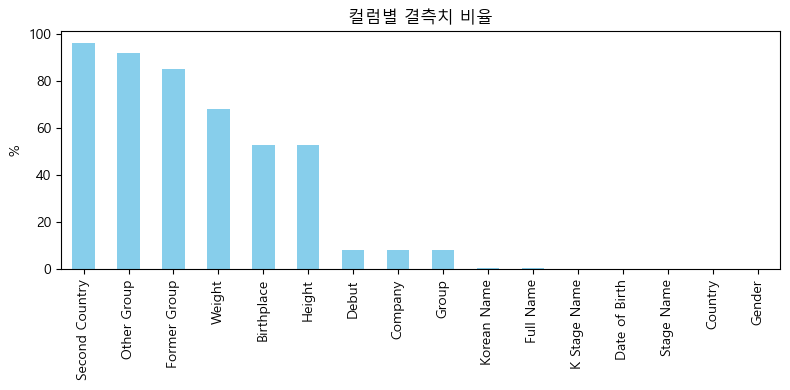

In [6]:
plt.figure(figsize=(8,4))
summary["결측치 비율(%)"].plot(kind='bar', color='skyblue')
plt.title("컬럼별 결측치 비율")
plt.ylabel("%")
plt.tight_layout()
plt.show()


In [7]:
# 이상치 제거 + 결측 Debut 제외
clean = df.dropna(subset=["Debut_Year"])
clean = clean[(clean["Debut_Year"] >= 1990) & (clean["Debut_Year"] <= 2025)]

clean.to_csv("clean_kpop.csv", index=False)
print("✅ clean_kpop.csv 파일 저장 완료")


✅ clean_kpop.csv 파일 저장 완료


In [8]:
# Debut_Year가 정상 범위(1990~2025) 내에 있는 행만 남기기
clean = df.dropna(subset=["Debut_Year"])
clean = clean[(clean["Debut_Year"] >= 1990) & (clean["Debut_Year"] <= 2025)]

print(f"정상 데이터 수: {len(clean)} / {len(df)}")


정상 데이터 수: 1625 / 1778


In [9]:
# 'South Korea'가 아닌 국가는 모두 외국인으로 분류
clean["is_foreign"] = clean["Country"].apply(
    lambda x: str(x).strip().lower() != "south korea"
)

# 확인
clean[["Stage Name", "Country", "is_foreign"]].head(10)


,Stage Name,Country,is_foreign
0,2Soul,South Korea,False
1,A.M,South Korea,False
2,Ace,South Korea,False
3,Aeji,South Korea,False
4,AhIn,South Korea,False
5,Ahra,South Korea,False
7,Ahyoon,South Korea,False
8,Ahyoon,South Korea,False
9,Ahyoung,South Korea,False
10,Ahyung,South Korea,False


In [10]:
clean.to_csv("clean_kpop.csv", index=False, encoding="utf-8-sig")
print("✅ clean_kpop.csv 저장 완료 (전처리 데이터 생성)")


✅ clean_kpop.csv 저장 완료 (전처리 데이터 생성)


In [11]:
# 연도별 인원 수 샘플
print(clean["Debut_Year"].value_counts().sort_index().tail(10))

# 외국인 비율 샘플
foreign_ratio = clean["is_foreign"].mean() * 100
print(f"전체 외국인 비율: {foreign_ratio:.1f}%")


Debut_Year
2014.0     91
2015.0    100
2016.0    114
2017.0    156
2018.0    116
2019.0    156
2020.0    200
2021.0    120
2022.0    179
2023.0     40
Name: count, dtype: int64
전체 외국인 비율: 9.8%


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'   # 한글 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 정제본 불러오기
df = pd.read_csv("clean_kpop.csv")

print("행 개수:", len(df))
print("컬럼 목록:", df.columns.tolist())

# 미리보기
df.head()


행 개수: 1625
컬럼 목록: ['Stage Name', 'Full Name', 'Korean Name', 'K Stage Name', 'Date of Birth', 'Group', 'Debut', 'Company', 'Country', 'Second Country', 'Height', 'Weight', 'Birthplace', 'Other Group', 'Former Group', 'Gender', 'Debut_Year', 'is_foreign']


,Stage Name,Full Name,Korean Name,K Stage Name,Date of Birth,Group,Debut,Company,Country,Second Country,Height,Weight,Birthplace,Other Group,Former Group,Gender,Debut_Year,is_foreign
0,2Soul,Kim Younghoon,김영훈,이솔,10/09/1997,7 O'clock,26/08/2014,Jungle,South Korea,NaN,172.0,55.0,NaN,NaN,NaN,M,2014.0,False
1,A.M,Seong Hyunwoo,성현우,에이엠,31/12/1996,Limitless,9/07/2019,ONO,South Korea,NaN,181.0,62.0,NaN,NaN,NaN,M,2019.0,False
2,Ace,Jang Wooyoung,장우영,에이스,28/08/1992,VAV,31/10/2015,A team,South Korea,NaN,177.0,63.0,NaN,NaN,NaN,M,2015.0,False
3,Aeji,Kwon Aeji,권애지,애지,25/10/1999,Hash Tag,11/10/2017,LUK,South Korea,NaN,163.0,NaN,Daegu,NaN,NaN,F,2017.0,False
4,AhIn,Lee Ahin,이아인,아인,27/09/1999,MOMOLAND,9/11/2016,Double Kick,South Korea,NaN,160.0,44.0,Wonju,NaN,NaN,F,2016.0,False


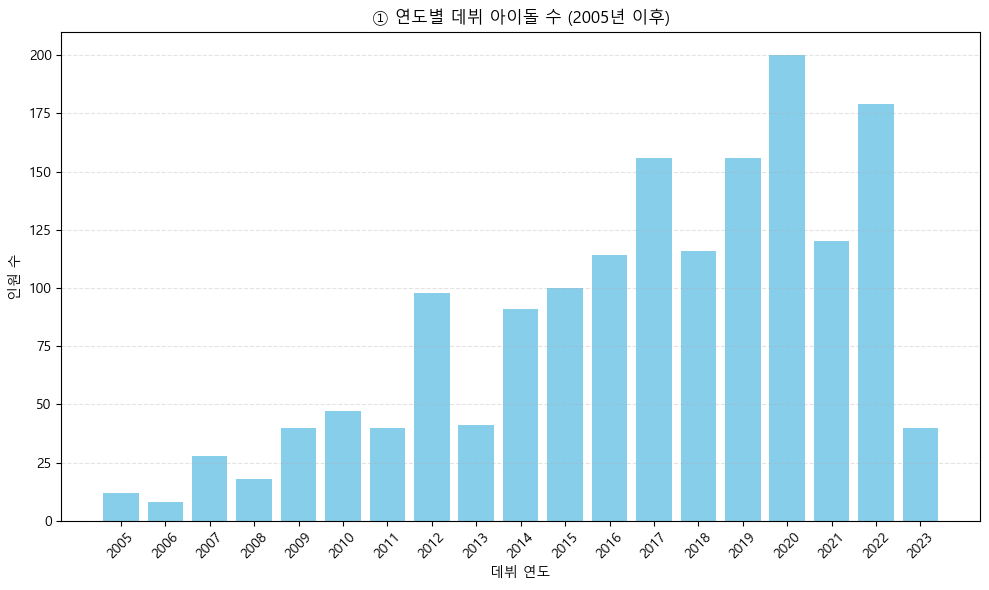

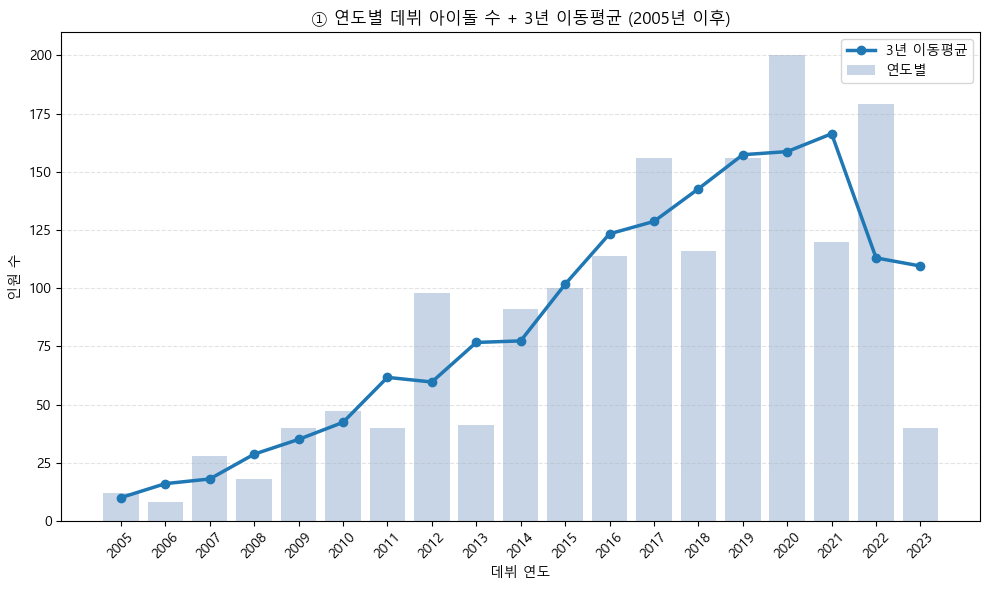

In [13]:
# ① 연도별 데뷔 아이돌 수
# 2005년 이후 데이터만 필터링(그 이전은 데이터 없는 연수가 많음)
# ① 연도별 데뷔 아이돌 수 (2005년 이후, 누락 연도 0 채움 + 정수 축)
recent_df = df[df["Debut_Year"].notna() & (df["Debut_Year"] >= 2005)].copy()
recent_df["Debut_Year"] = recent_df["Debut_Year"].astype(int)

# 연속 연도 인덱스 만들기
years = range(recent_df["Debut_Year"].min(), recent_df["Debut_Year"].max() + 1)

# 연도별 카운트 집계 후, 누락 연도는 0으로 채움
debut_counts = (
    recent_df["Debut_Year"]
    .value_counts()
    .reindex(years, fill_value=0)   # ← 빈 해는 0
    .sort_index()
)

plt.figure(figsize=(10,6))
plt.bar(debut_counts.index, debut_counts.values, color='skyblue', edgecolor='none')
plt.title("① 연도별 데뷔 아이돌 수 (2005년 이후)")
plt.xlabel("데뷔 연도")
plt.ylabel("인원 수")
plt.grid(axis='y', linestyle='--', alpha=0.35)

# 정수형 x축 라벨
plt.xticks(ticks=list(debut_counts.index), labels=list(debut_counts.index), rotation=45)

plt.tight_layout()
plt.show()

# (선택) 3년 이동평균 라인 추가 버전
ma3 = debut_counts.rolling(window=3, min_periods=1, center=True).mean()
plt.figure(figsize=(10,6))
plt.bar(debut_counts.index, debut_counts.values, color='lightsteelblue', edgecolor='none', alpha=0.7, label='연도별')
plt.plot(ma3.index, ma3.values, marker='o', linewidth=2.5, label='3년 이동평균')
plt.title("① 연도별 데뷔 아이돌 수 + 3년 이동평균 (2005년 이후)")
plt.xlabel("데뷔 연도")
plt.ylabel("인원 수")
plt.grid(axis='y', linestyle='--', alpha=0.35)
plt.xticks(ticks=list(debut_counts.index), labels=list(debut_counts.index), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



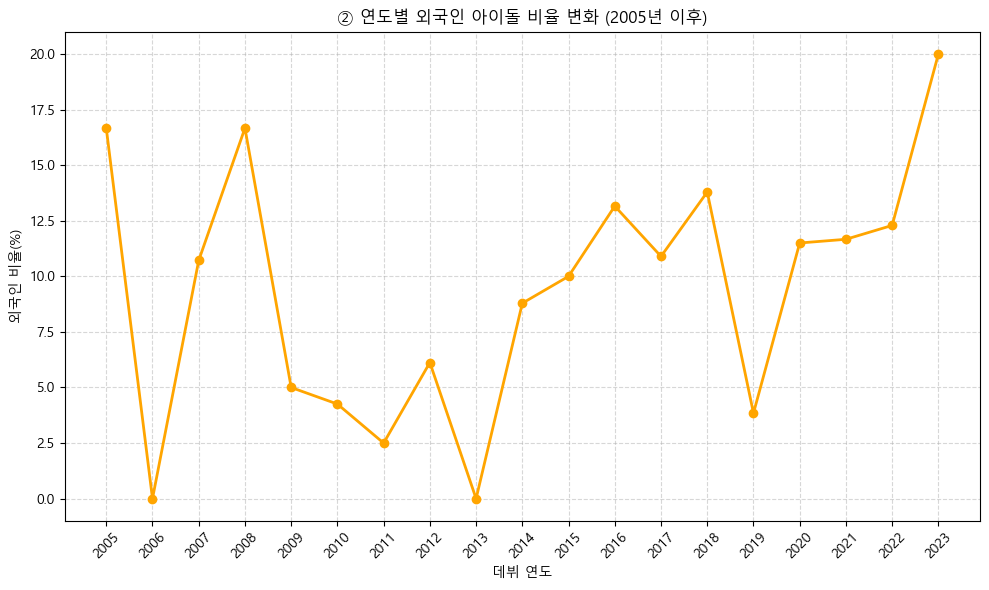

연도별 표본 수(데뷔 인원):


Debut_Year
2014     91
2015    100
2016    114
2017    156
2018    116
2019    156
2020    200
2021    120
2022    179
2023     40
dtype: int64

In [14]:
# ② 연도별 외국인 아이돌 비율 변화

# 1) 날짜 파싱 (dayfirst=True)
tmp_dt = pd.to_datetime(df["Debut"], errors="coerce", dayfirst=True)
year_from_dt = tmp_dt.dt.year
year_from_regex = df["Debut"].astype(str).str.extract(r"(\d{4})")[0].astype(float)

# 2) Debut_Year 완성
df["Debut_Year"] = year_from_dt.fillna(year_from_regex).astype("Int64")

# 3) 분석 구간 필터 (2005~2025)
recent = df[
    df["Debut_Year"].notna() &
    (df["Debut_Year"] >= 2005) &
    (df["Debut_Year"] <= 2025)
].copy()
recent["Debut_Year"] = recent["Debut_Year"].astype(int)

# 4) 연속 연도 인덱스 만들기
years = range(recent["Debut_Year"].min(), recent["Debut_Year"].max() + 1)

# 5) 연도별 총 인원 / 외국인 인원
totals  = recent.groupby("Debut_Year").size().reindex(years, fill_value=0)
foreigns = recent.groupby("Debut_Year")["is_foreign"].sum().reindex(years, fill_value=0)

# 6) 비율 계산 (표본 0년은 NaN)
yearly_foreign_ratio = (foreigns / totals.replace(0, pd.NA) * 100)

# 7) 시각화
plt.figure(figsize=(10,6))
plt.plot(list(years), yearly_foreign_ratio.values, marker='o', linewidth=2, color='orange')
plt.title("② 연도별 외국인 아이돌 비율 변화 (2005년 이후)")
plt.xlabel("데뷔 연도")
plt.ylabel("외국인 비율(%)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(ticks=list(years), labels=list(years), rotation=45)
plt.tight_layout()
plt.show()

# (선택) 표본 수 함께 확인
print("연도별 표본 수(데뷔 인원):")
display(totals.tail(10))


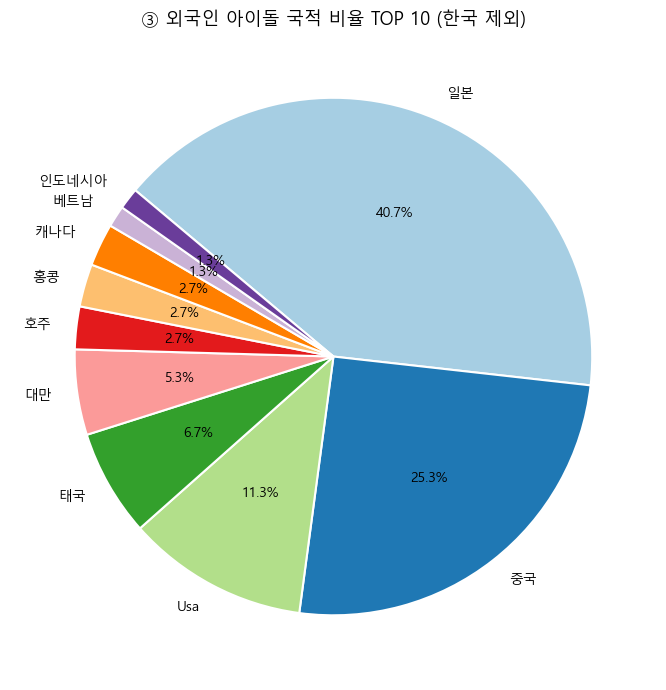

In [15]:
# ③ 국적별 아이돌 수 TOP 10
# 🇰🇷 제외: 외국인만 필터링
# Country 전처리: 공백 제거 + 소문자 통일
import matplotlib.pyplot as plt

# Country 전처리
df["Country"] = df["Country"].astype(str).str.strip()
df["Country_clean"] = df["Country"].str.title()  # 예: Japan → Japan, Thailand → Thailand

# 🇰🇷 제외
foreign_df = df[df["Country_clean"].str.lower() != "south korea"]

# 국적별 TOP 10
country_top10_foreign = foreign_df["Country_clean"].value_counts().head(10)

# ✅ 영문 → 한글 매핑 딕셔너리
country_kor_map = {
    "Japan": "일본",
    "China": "중국",
    "Thailand": "태국",
    "United States": "미국",
    "Taiwan": "대만",
    "Philippines": "필리핀",
    "Indonesia": "인도네시아",
    "Vietnam": "베트남",
    "Australia": "호주",
    "Canada": "캐나다",
    "Malaysia": "말레이시아",
    "Hong Kong": "홍콩",
    "Singapore": "싱가포르",
    "Mexico": "멕시코",
    "France": "프랑스",
    "Germany": "독일",
    "Russia": "러시아",
    "United Kingdom": "영국"
}

# 한글 이름으로 변환 (없는 건 그대로 유지)
country_labels = [
    country_kor_map.get(name, name) for name in country_top10_foreign.index
]

# 색상 팔레트 (10개 국적용)
colors = plt.cm.Paired.colors[:10]

plt.figure(figsize=(7,7))
plt.pie(
    country_top10_foreign.values,
    labels=country_labels,
    autopct='%1.1f%%',
    startangle=140,
    counterclock=False,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)
plt.title("③ 외국인 아이돌 국적 비율 TOP 10 (한국 제외)", fontsize=13)
plt.tight_layout()
plt.show()



In [16]:
(foreign_df["Country"].value_counts(normalize=True).head(10) * 100)


Country
Japan        38.364780
China        23.899371
USA          10.691824
Thailand      6.289308
Taiwan        5.031447
Australia     2.515723
Hong Kong     2.515723
Canada        2.515723
Vietnam       1.257862
Indonesia     1.257862
Name: proportion, dtype: float64

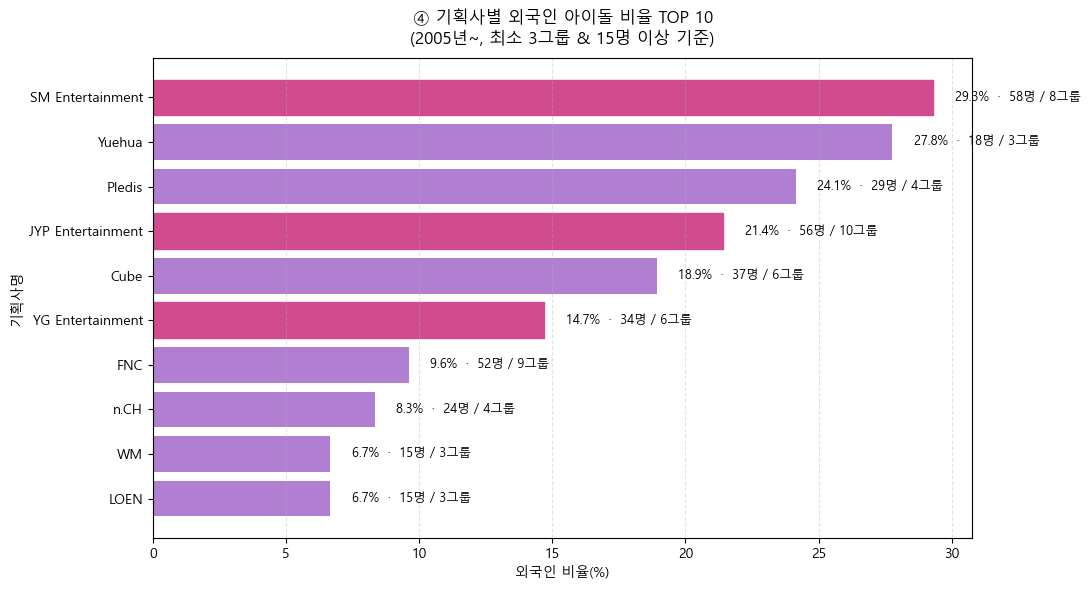

In [17]:
# ④ 기획사별 외국인 비율 TOP 10
# 회사별 아이돌 수와 외국인 비율 계산
import re
import matplotlib.pyplot as plt

# 0) 2005년 이후 + 회사명 정규화
work = df[df["Debut_Year"].notna() & (df["Debut_Year"] >= 2005)].copy()

# 회사명 전처리: 양쪽 공백 제거 + 내부 다중 공백 정리
work["Company"] = (
    work["Company"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
)

# 대표 대형사 별칭 통합 (필요 시 계속 추가 가능)
aliases = {
    r"^sm.*": "SM Entertainment",
    r"^jyp.*": "JYP Entertainment",
    r".*hybe.*": "HYBE",
    r"^yg.*": "YG Entertainment",
}
def normalize_company(name: str) -> str:
    n = name.lower()
    for pat, repl in aliases.items():
        if re.match(pat, n):
            return repl
    return name  # 매칭 없으면 원문 유지
work["Company_norm"] = work["Company"].apply(normalize_company)

# 1) 회사별 지표 계산: 아이돌 수, 그룹 수, 외국인 비율
company_stats = (
    work.groupby("Company_norm")
    .agg(
        idol_count=("Stage Name", "count"),
        group_count=("Group", pd.Series.nunique),
        foreign_ratio=("is_foreign", "mean"),
        foreign_count=("is_foreign", "sum")
    )
)

# 2) 표본 기준: 최소 3그룹 + 15명 이상
filtered = company_stats[(company_stats["group_count"] >= 3) & (company_stats["idol_count"] >= 15)].copy()
filtered["foreign_ratio_pct"] = filtered["foreign_ratio"] * 100

# 3) 상위 10개(외국인 비율 높은 순)
top10 = filtered.sort_values("foreign_ratio_pct", ascending=False).head(10)

# 4) 시각화
major_labels = ["SM Entertainment", "JYP Entertainment", "YG Entertainment", "HYBE"]

plt.figure(figsize=(11, 6))
bars = plt.barh(top10.index, top10["foreign_ratio_pct"], color="#b07fd2", edgecolor="none")

# 대형 4사 색상 강조
for i, label in enumerate(top10.index):
    if label in major_labels:
        bars[i].set_color("#d14b8f")  # 강조색

# 값 라벨: 비율 & 표본(아이돌 수 / 그룹 수)
for i, (idx, row) in enumerate(top10.iterrows()):
    txt = f"{row['foreign_ratio_pct']:.1f}%  ·  {int(row['idol_count'])}명 / {int(row['group_count'])}그룹"
    plt.text(row["foreign_ratio_pct"] + 0.8, i, txt, va="center", fontsize=9)

plt.title("④ 기획사별 외국인 아이돌 비율 TOP 10\n(2005년~, 최소 3그룹 & 15명 이상 기준)", pad=10)
plt.xlabel("외국인 비율(%)")
plt.ylabel("기획사명")
plt.grid(axis="x", linestyle="--", alpha=0.35)
plt.gca().invert_yaxis()  # 상위가 위로 오도록
plt.tight_layout()
plt.show()



In [ ]:
# ② 연도별 외국인 아이돌 비율 변화 (2009년 이후)

# 1) 날짜 파싱 (dayfirst=True)
tmp_dt = pd.to_datetime(df["Debut"], errors="coerce", dayfirst=True)
year_from_dt = tmp_dt.dt.year
year_from_regex = df["Debut"].astype(str).str.extract(r"(\d{4})")[0].astype(float)

# 2) Debut_Year 완성
df["Debut_Year"] = year_from_dt.fillna(year_from_regex).astype("Int64")

# 3) 분석 구간 필터 (2009~2025로 변경)
recent = df[
    df["Debut_Year"].notna() &
    (df["Debut_Year"] >= 2009) &
    (df["Debut_Year"] <= 2025)
].copy()
recent["Debut_Year"] = recent["Debut_Year"].astype(int)

# 4) 연속 연도 인덱스 만들기
years = range(recent["Debut_Year"].min(), recent["Debut_Year"].max() + 1)

# 5) 연도별 총 인원 / 외국인 인원
totals  = recent.groupby("Debut_Year").size().reindex(years, fill_value=0)
foreigns = recent.groupby("Debut_Year")["is_foreign"].sum().reindex(years, fill_value=0)

# 6) 비율 계산 (표본 0년은 NaN)
yearly_foreign_ratio = (foreigns / totals.replace(0, pd.NA) * 100)

# 7) 시각화
plt.figure(figsize=(10,6))
plt.plot(list(years), yearly_foreign_ratio.values, marker='o', linewidth=2, color='orange')
plt.title("② 연도별 외국인 아이돌 비율 변화 (2009년 이후)")
plt.xlabel("데뷔 연도")
plt.ylabel("외국인 비율(%)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(ticks=list(years), labels=list(years), rotation=45)
plt.tight_layout()
plt.show()

# (선택) 표본 수 함께 확인
print("연도별 표본 수(데뷔 인원):")
display(totals.tail(10))
